In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
import matplotlib as mpl
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np
import warnings as wn
from xhistogram.xarray import histogram as xh
%reload_ext autoreload
%autoreload 2
import esm2m.myfunctions as func

In [2]:
rootdir = '/local/ss23/NEW_MI'
filename = 'MI_hitemp_sens_k11_ens*_1x1_1950_2100.nc'
path = rootdir+'/'+filename
k11_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
k11_avg = k11_all.mean(dim='ensemble')

In [3]:
rootdir = '/local/ss23/NEW_MI'
filename = 'MI_k01_ens*_1x1_1950_2100.nc'
path = rootdir+'/'+filename
k11_allLo = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
k11_avgLo = k11_allLo.mean(dim='ensemble')

In [9]:
k11Avg = xr.open_dataset('/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k11_ens131_1x1_1950_2100.nc')
k11AvgLo = xr.open_dataset('/home/aos/ystochel/esm2m/data/processed/MI_k01_ens130_1x1_1950_2100.nc')
total = 43210

# Spatial Maps

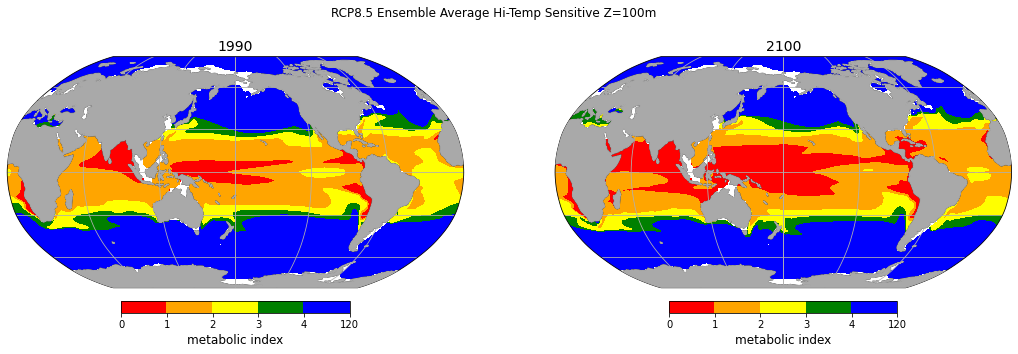

In [16]:
fig, (ax0,ax1) = plt.subplots(figsize=(18,5),nrows=1,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Hi-Temp Sensitive Z=100m')
wn.filterwarnings('ignore')
func.graph(k11Avg, ax0, '1990', 1990, None, False)
func.graph(k11Avg, ax1, '2100', 2100, None, False)

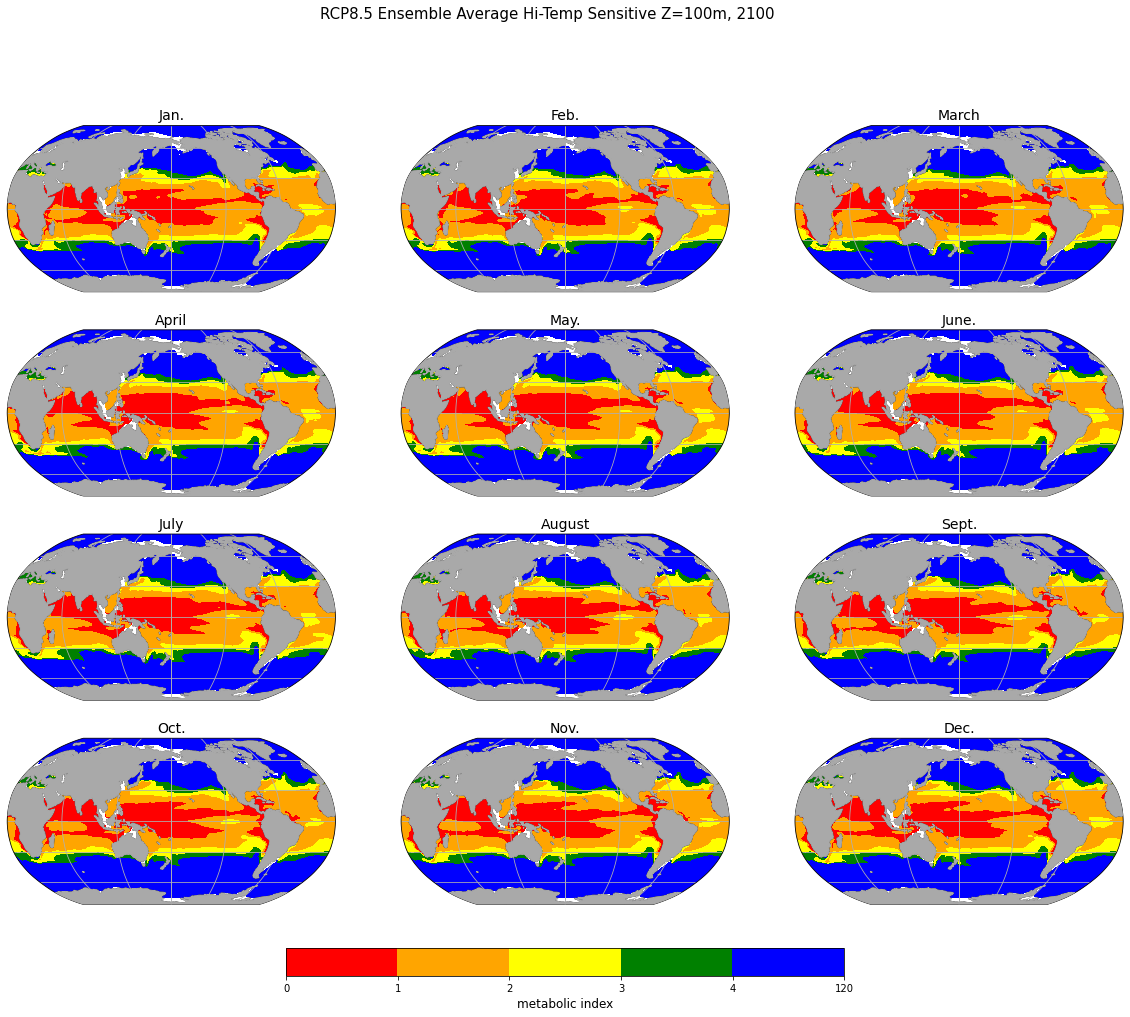

In [17]:
func.months_of_year(k11Avg,'2100','RCP8.5 Ensemble Average Hi-Temp Sensitive Z=100m, 2100')

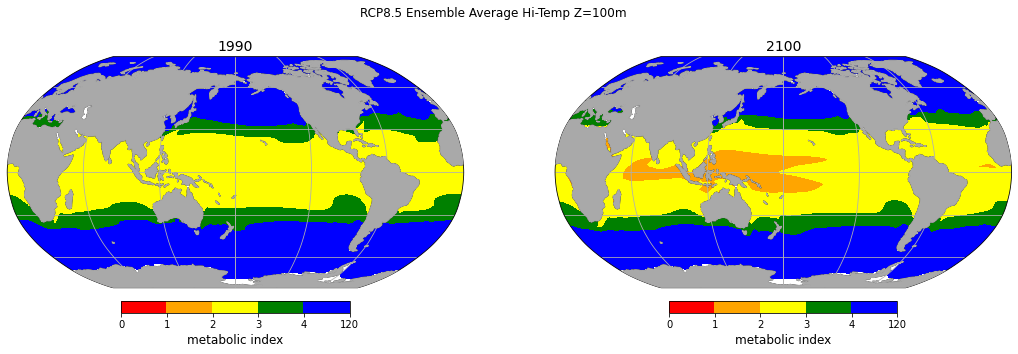

In [18]:
fig, (ax0,ax1) = plt.subplots(figsize=(18,5),nrows=1,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Hi-Temp Z=100m')
wn.filterwarnings('ignore')
func.graph(k11AvgLo, ax0, '1990', 1990, None, False)
func.graph(k11AvgLo, ax1, '2100', 2100, None, False)

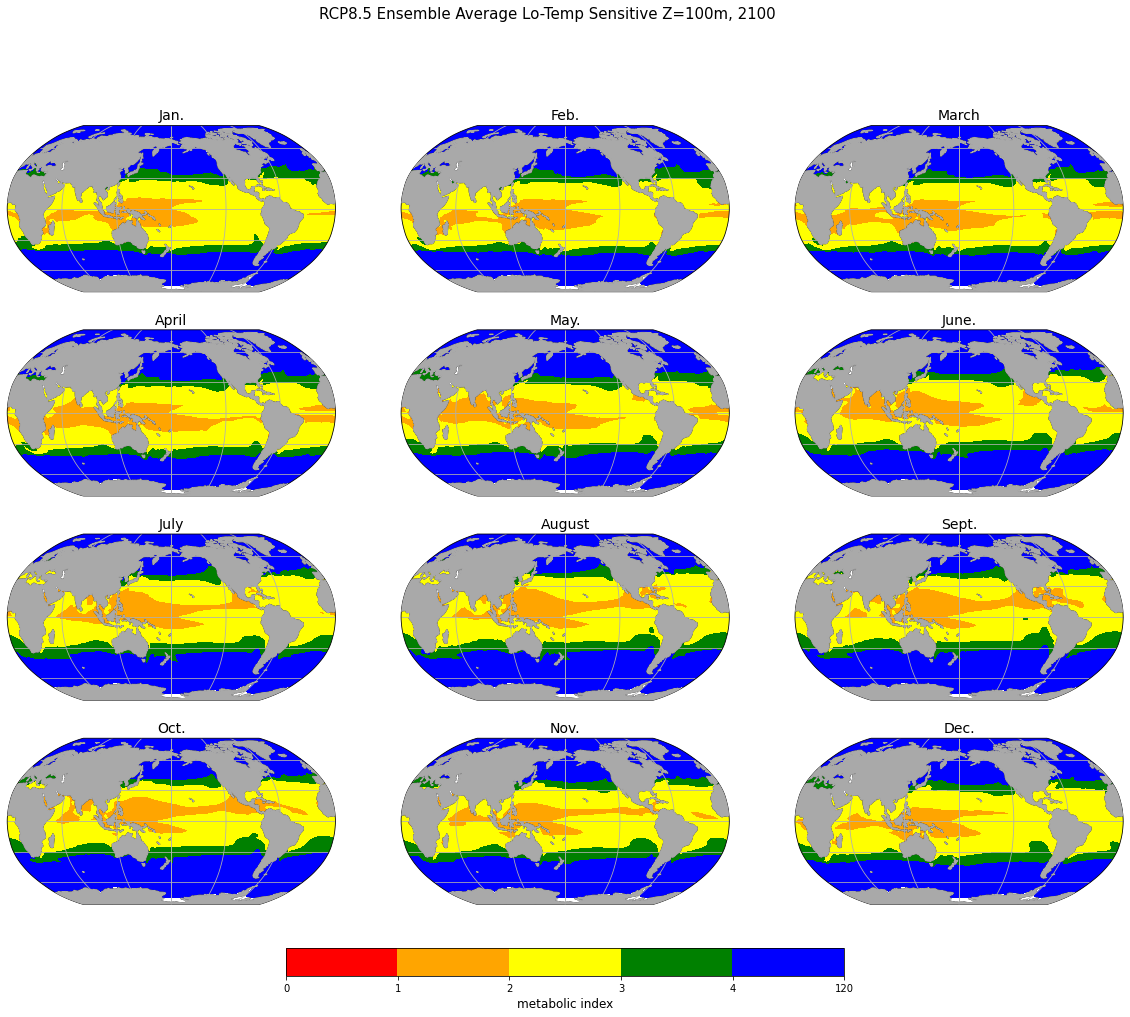

In [19]:
func.months_of_year(k11AvgLo,'2100','RCP8.5 Ensemble Average Lo-Temp Sensitive Z=100m, 2100')

# Habitable Region

In [4]:
hab = ~np.isnan(k11_all.where(k11_all['MI']>2.0))
habSum = hab['MI'].sum(dim='yt_ocean').sum(dim='xt_ocean')
habSum = habSum.sel(time=slice('1990-01-01','2100-12-31'))
habSum = habSum.groupby('time.year').mean()
habDec = (habSum/habSum.sel(year=1990))*100
habDec = habDec.mean(dim='ensemble')

In [5]:
habLo = ~np.isnan(k11_allLo.where(k11_allLo['MI']>4.0))
habSumLo = habLo['MI'].sum(dim='yt_ocean').sum(dim='xt_ocean')
habSumLo = habSumLo.sel(time=slice('1990-01-01','2100-12-31'))
habSumLo = habSumLo.groupby('time.year').mean()
habDecLo = (habSumLo/habSumLo.sel(year=1990))*100
habDecLo = habDecLo.mean(dim='ensemble')

In [10]:
gloLo = ~np.isnan(k11_allLo.where(k11_allLo['MI']>4.0))
gloSumLo = gloLo['MI'].sum(dim='yt_ocean').sum(dim='xt_ocean')
gloSumLo = gloSumLo.sel(time=slice('1990-01-01','2100-12-31'))
gloSumLo = gloSumLo.groupby('time.year').mean()
gloDecLo = (gloSumLo/total)*100
gloDecLo = gloDecLo.mean(dim='ensemble')

In [13]:
glo = ~np.isnan(k11_all.where(k11_all['MI']>2.0))
gloSum = glo['MI'].sum(dim='yt_ocean').sum(dim='xt_ocean')
gloSum = gloSum.sel(time=slice('1990-01-01','2100-12-31'))
gloSum = gloSum.groupby('time.year').mean()
gloDec = (gloSum/43210)*100
gloDec = gloDec.mean(dim='ensemble')

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


Text(0.5, 0, 'Year')

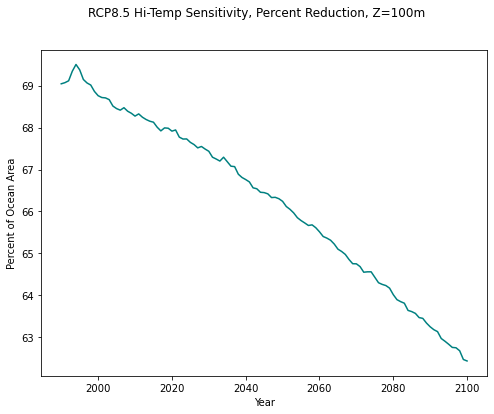

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('RCP8.5 Hi-Temp Sensitivity, Percent Reduction, Z=100m')
ax.plot(np.unique(gloDec['year']),gloDec,color='teal')
ax.set_ylabel('Percent of Ocean Area')
ax.set_xlabel('Year')

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


Text(0.5, 0, 'Year')

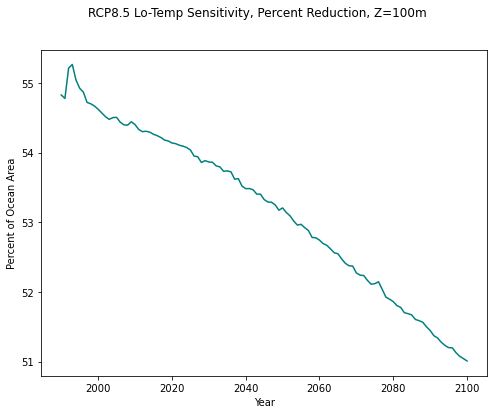

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('RCP8.5 Lo-Temp Sensitivity, Percent Reduction, Z=100m')
ax.plot(np.unique(gloDecLo['year']),gloDecLo,color='teal')
ax.set_ylabel('Percent of Ocean Area')
ax.set_xlabel('Year')

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


Text(0.5, 0, 'Year')

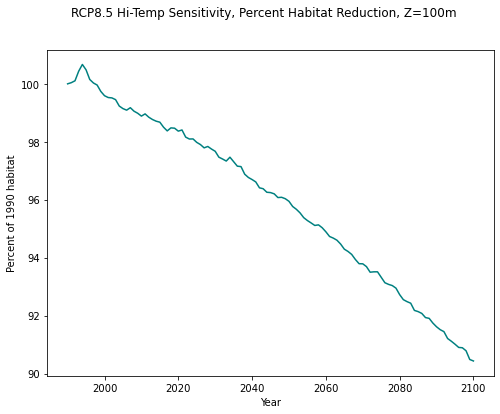

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('RCP8.5 Hi-Temp Sensitivity, Percent Habitat Reduction, Z=100m')
ax.plot(np.unique(habDec['year']),habDec,color='teal')
ax.set_ylabel('Percent of 1990 habitat')
ax.set_xlabel('Year')

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


Text(0.5, 0, 'Year')

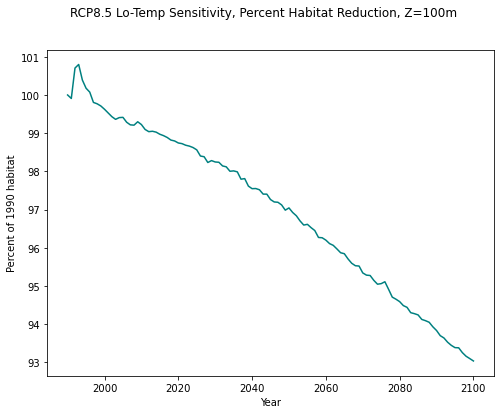

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('RCP8.5 Lo-Temp Sensitivity, Percent Habitat Reduction, Z=100m')
ax.plot(np.unique(habDecLo['year']),habDecLo,color='teal')
ax.set_ylabel('Percent of 1990 habitat')
ax.set_xlabel('Year')